In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

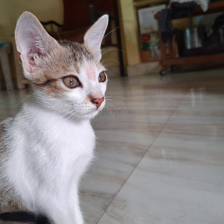

In [3]:
cat = Image.open("C:/Users/admin/Desktop/ML/pp.jpg").resize(IMAGE_SHAPE)
cat

In [4]:
cat = np.array(cat)/255.0
cat.shape

(224, 224, 3)

In [5]:
cat[np.newaxis, ...]

array([[[[0.40392157, 0.37647059, 0.26666667],
         [0.38823529, 0.36078431, 0.25098039],
         [0.39215686, 0.36470588, 0.25490196],
         ...,
         [0.12156863, 0.08235294, 0.05882353],
         [0.14117647, 0.08235294, 0.05882353],
         [0.15686275, 0.09019608, 0.06666667]],

        [[0.38823529, 0.36078431, 0.25098039],
         [0.39215686, 0.36470588, 0.25490196],
         [0.39215686, 0.36470588, 0.25490196],
         ...,
         [0.17254902, 0.10588235, 0.07058824],
         [0.18431373, 0.10980392, 0.07058824],
         [0.18823529, 0.10980392, 0.06666667]],

        [[0.39607843, 0.36862745, 0.25882353],
         [0.38431373, 0.35686275, 0.24705882],
         [0.38823529, 0.36078431, 0.25098039],
         ...,
         [0.20392157, 0.11372549, 0.05882353],
         [0.20784314, 0.10980392, 0.05490196],
         [0.20784314, 0.10980392, 0.05098039]],

        ...,

        [[0.2627451 , 0.24705882, 0.24313725],
         [0.27843137, 0.2627451 , 0.25490196]

In [6]:
result = classifier.predict(cat[np.newaxis, ...])
result.shape
predicted_label_index = np.argmax(result)
predicted_label_index
image_labels = []
with open("C:/Users/admin/Desktop/New folder/classes1.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[predicted_label_index]

'Egyptian cat'

In [7]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('catsanddogs', origin=dataset_url,  cache_dir='.', untar=True)

68608000/68606236 [==============================] - 85s 1us/step


In [16]:
data_dir

WindowsPath('datasets/catsanddogs')

In [24]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/catsanddogs')

In [63]:
animal_images_dict = {
    'cat':list(data_dir.glob('cats_and_dogs_filtered/train/cats/*')),
    'dog':list(data_dir.glob('cats_and_dogs_filtered/train/dogs/*')),
}

In [64]:
animal_labels_dict = {
    'cat': 0,
    'dog': 1,
}

In [65]:
animal_images_dict['cat'][:5]

[WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/cats/cat.0.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/cats/cat.1.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/cats/cat.10.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/cats/cat.100.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/cats/cat.101.jpg')]

In [66]:
animal_images_dict['dog'][:5]

[WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/dogs/dog.0.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/dogs/dog.1.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/dogs/dog.10.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/dogs/dog.100.jpg'),
 WindowsPath('datasets/catsanddogs/cats_and_dogs_filtered/train/dogs/dog.101.jpg')]

In [67]:
X, y = [], []

for animal_name, images in animal_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(animal_labels_dict[animal_name])

In [68]:
X = np.array(X)
y = np.array(y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [71]:
X[0].shape

(224, 224, 3)

In [72]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [73]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

(224, 224, 3)

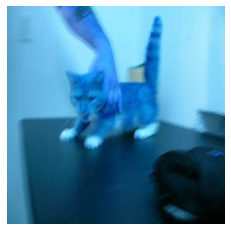

In [82]:
plt.axis('off')
plt.imshow(X[0])
x2_resized.shape

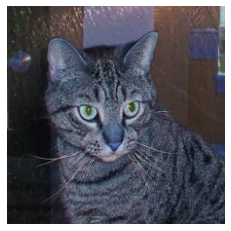

In [75]:
plt.axis('off')
plt.imshow(X[1])

In [81]:
predicted = classifier.predict(np.array([x1_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795], dtype=int64)

In [83]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [84]:
model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(2)
])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [86]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [87]:
model.fit(X_train_scaled, y_train, epochs=5)


Epoch 1/5
47/47 [==============================] - 32s 583ms/step - loss: 0.4090 - acc: 0.8059
Epoch 2/5
47/47 [==============================] - 28s 604ms/step - loss: 0.0799 - acc: 0.9665
Epoch 3/5
47/47 [==============================] - 28s 585ms/step - loss: 0.0479 - acc: 0.9837
Epoch 4/5
47/47 [==============================] - 27s 582ms/step - loss: 0.0346 - acc: 0.9919
Epoch 5/5
47/47 [==============================] - 27s 581ms/step - loss: 0.0278 - acc: 0.9974


In [88]:
model.evaluate(X_test_scaled,y_test)

16/16 [==============================] - 10s 586ms/step - loss: 0.0590 - acc: 0.9820


[0.05896798148751259, 0.9819999933242798]

In [91]:
p=model.predict(cat[np.newaxis, ...])

In [92]:
catogory=['cat','dog']


0

In [93]:
catogory[np.argmax(p)]

'cat'